In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Analysis of Seattle and Boston Airbnb Data

 This analysis focuses on Airbnb listings in Seattle and Boston. Our goal is to examine the correlations between various variables. This analysis includes steps for data cleaning, transformation, and visualization.


## Business Understanding

### Brief Description

Airbnb listings provide a wealth of data about hosts, prices, and review scores. By analyzing this data, we can uncover insights about what factors contribute to higher review scores and potentially higher earnings for hosts.


### Question 1

How do host characteristics (response rate, acceptance rate, superhost status) correlate with review scores?


### Question 2

Is there a significant difference in the correlation of host characteristics with review scores between Seattle and Boston?


### Question 3

What is the relationship between listing price and review scores?


## Data Understanding

### Access and Explore

We will load and clean the datasets from Seattle and Boston to ensure they are ready for analysis.


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Prepare Data

### Load and Clean Seattle Data

The following code loads and cleans the Seattle Airbnb listings.


In [16]:
def load_and_clean_data(file_path):
    """
    Load and clean the Airbnb listings dataset.
    
    Parameters:
    file_path (str): The path to the CSV file containing the dataset.
    
    Returns:
    pd.DataFrame: A cleaned DataFrame with selected columns and processed data.
    """
    # Load dataset
    df = pd.read_csv(file_path)

    # Select relevant columns
    df = df[[
        "id", "name", "host_location", "host_response_time", "host_response_rate", 
        "host_acceptance_rate", "host_is_superhost", "host_has_profile_pic", 
        "host_identity_verified", "price", "review_scores_rating"
    ]]

    # Drop rows with any missing values to ensure data quality
    df = df.dropna()

    # Convert percentage columns to float
    df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float') / 100.0
    df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

    # Convert 't' and 'f' strings to boolean values
    df['host_is_superhost'] = df['host_is_superhost'].replace({'t': True, 'f': False}).astype('bool')
    df['host_has_profile_pic'] = df['host_has_profile_pic'].replace({'t': True, 'f': False}).astype('bool')
    df['host_identity_verified'] = df['host_identity_verified'].replace({'t': True, 'f': False}).astype('bool')

    # Convert price column to numeric format
    df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype('float')

    return df

# Load and clean Seattle Airbnb listings dataset
file_path_seattle = 'listings_seatle.csv'
df_seattle = load_and_clean_data(file_path_seattle)


### Load and Clean Boston Data

The following code loads and cleans the Boston Airbnb listings.


In [17]:
# Load and clean Boston Airbnb listings dataset
file_path_boston = 'listings.csv'
df_boston = load_and_clean_data(file_path_boston)


## Evaluation

### Question 1: How do host characteristics (response rate, acceptance rate, superhost status) correlate with review scores?

#### Analyze

We will compute the correlation matrix to analyze the relationships between host characteristics and review scores.


host_response_rate        0.159508
host_acceptance_rate     -0.016287
host_is_superhost         0.261081
host_has_profile_pic     -0.017855
host_identity_verified    0.077732
review_scores_rating      1.000000
price                     0.055088
Name: review_scores_rating, dtype: float64


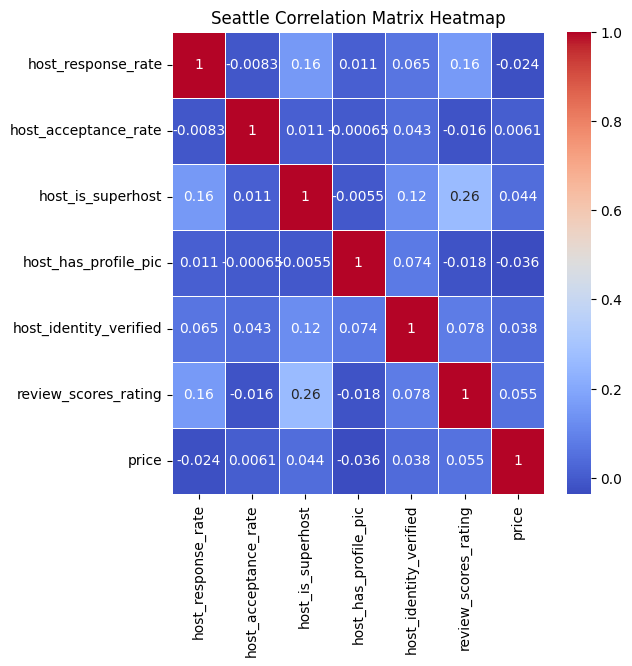

In [18]:
def compute_and_plot_correlation(df, columns, title):
    """
    Compute and plot the correlation matrix for the given DataFrame and columns.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): The list of columns to include in the correlation analysis.
    title (str): The title for the correlation matrix heatmap.
    
    Returns:
    pd.DataFrame: The computed correlation matrix.
    """
    # Create a new DataFrame with selected columns
    df_selected = df[columns]

    # Compute the correlation matrix
    correlation_matrix = df_selected.corr()

    # Display the correlation of review_scores_rating with other variables
    print(correlation_matrix['review_scores_rating'])

    # Plot the correlation matrix heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title(title)
    plt.show()

    return correlation_matrix

# Select columns of interest for correlation analysis
selected_columns = [
    'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
    'host_has_profile_pic', 'host_identity_verified', 'review_scores_rating', 'price'
]

# Compute and plot the correlation matrix for Seattle
correlation_matrix_seattle = compute_and_plot_correlation(df_seattle, selected_columns, 'Seattle Correlation Matrix Heatmap')


#### Visualize

The following code plots the correlation matrix heatmap for Seattle.


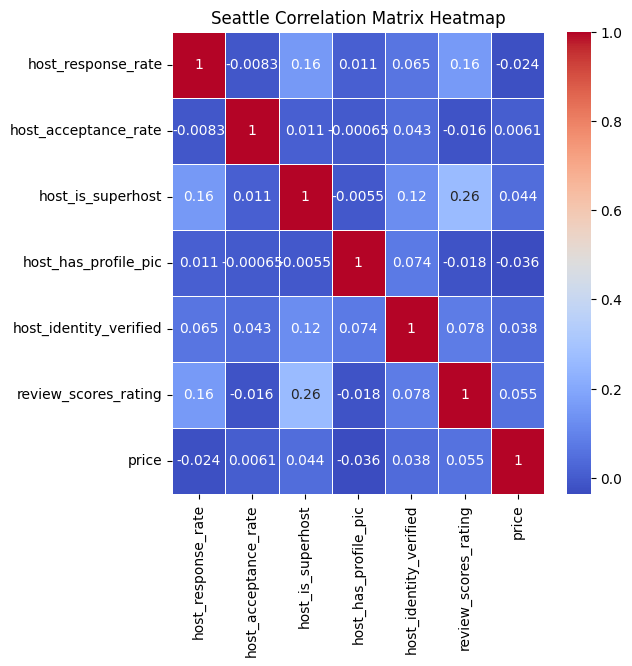

In [19]:
# Plot the correlation matrix heatmap for Seattle
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix_seattle, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Seattle Correlation Matrix Heatmap')
plt.show()


#### Brief Explanation for Visualization

The heatmap visualizes the correlations between various host characteristics and review scores. Higher correlations are indicated by brighter colors.


### Question 2: Is there a significant difference in the correlation of host characteristics with review scores between Seattle and Boston?

#### Analyze

We will compute and compare the correlation matrices for both Seattle and Boston.


host_response_rate        0.085897
host_acceptance_rate      0.029590
host_is_superhost         0.239211
host_has_profile_pic     -0.028575
host_identity_verified    0.074953
review_scores_rating      1.000000
price                     0.095957
Name: review_scores_rating, dtype: float64


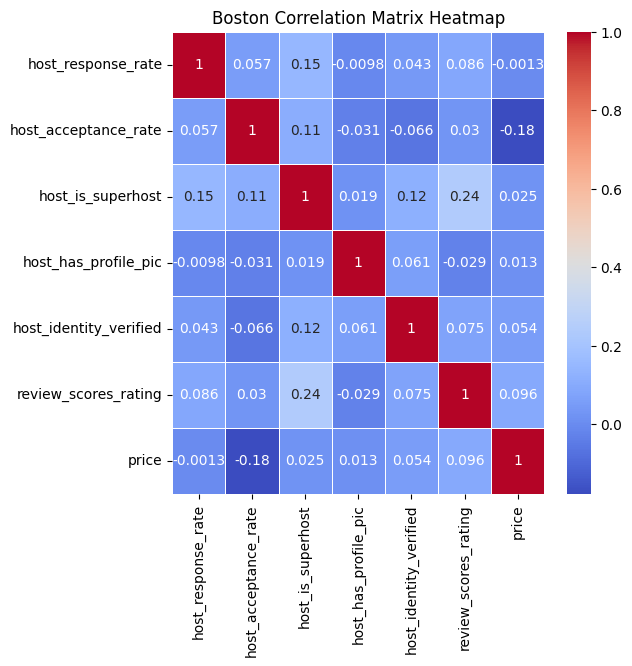

In [20]:
# Compute and plot the correlation matrix for Boston
correlation_matrix_boston = compute_and_plot_correlation(df_boston, selected_columns, 'Boston Correlation Matrix Heatmap')


#### Visualize

The following code plots the correlation matrix heatmap for Boston.


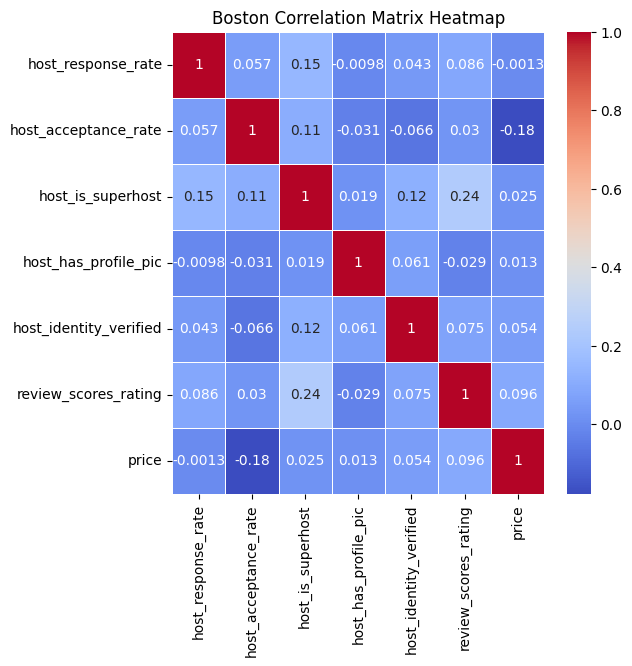

In [21]:
# Plot the correlation matrix heatmap for Boston
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix_boston, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Boston Correlation Matrix Heatmap')
plt.show()


#### Brief Explanation for Visualization

By comparing the heatmaps for Seattle and Boston, we can observe any differences in the relationships between host characteristics and review scores.


### Question 3: What is the relationship between listing price and review scores?

#### Analyze

We will examine the correlation between listing price and review scores.


In [22]:
# Display the correlation of price with review scores in Seattle and Boston
print("Seattle - Price and Review Scores Correlation:")
print(correlation_matrix_seattle['price']['review_scores_rating'])

print("Boston - Price and Review Scores Correlation:")
print(correlation_matrix_boston['price']['review_scores_rating'])


Seattle - Price and Review Scores Correlation:
0.05508795046943308
Boston - Price and Review Scores Correlation:
0.09595734382946663


#### Visualize

The following code creates scatter plots of price vs. review scores for both Seattle and Boston.


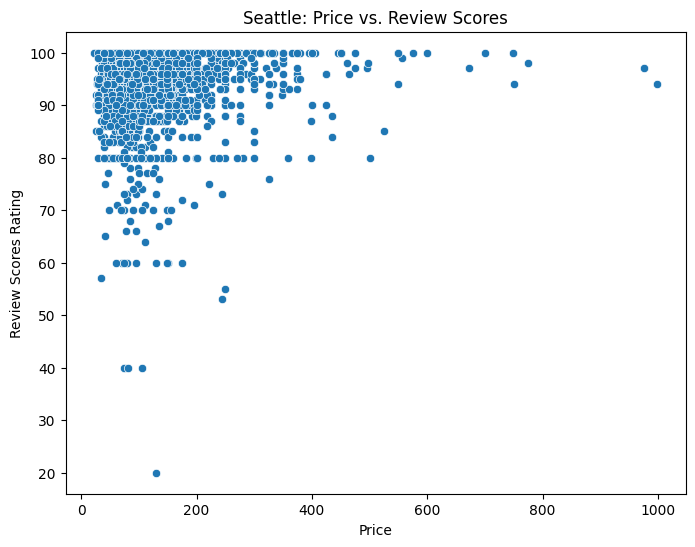

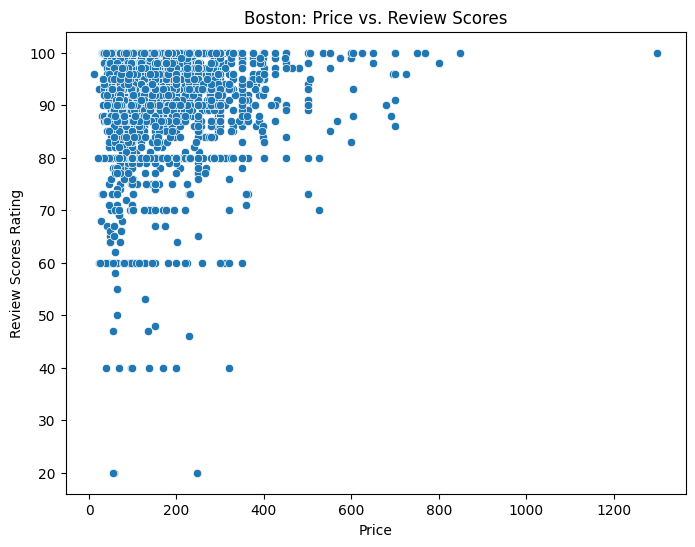

In [23]:
# Scatter plot of price vs. review scores for Seattle
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='review_scores_rating', data=df_seattle)
plt.title('Seattle: Price vs. Review Scores')
plt.xlabel('Price')
plt.ylabel('Review Scores Rating')
plt.show()

# Scatter plot of price vs. review scores for Boston
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='review_scores_rating', data=df_boston)
plt.title('Boston: Price vs. Review Scores')
plt.xlabel('Price')
plt.ylabel('Review Scores Rating')
plt.show()


#### Brief Explanation for Visualization

The scatter plots illustrate the relationship between listing price and review scores. By examining these plots, we can identify any trends or patterns in how price affects review scores.
